## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 

## Importing the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\1.ushape.csv",header=None) 
df.head() 

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


### Seperating the Input and Output Features

In [3]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [4]:
x.head() 

,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321


In [5]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: 2, dtype: int32

### Split the data into train and test

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [7]:
x_train.shape

(90, 2)

In [8]:
x_test.shape 

(10, 2)

### Standardising input features

In [9]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

### Build the Logical Structure

In [10]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(12,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))  

In [11]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                54        
                                                                 
 dense_1 (Dense)             (None, 16)                304       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 675 (2.64 KB)
Trainable params: 675 (2.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compling the model

In [12]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.1),metrics=["accuracy"])

In [13]:
history=model.fit(x_train,y_train,batch_size=5,epochs=45,validation_split=0.1)

Epoch 1/45
17/17 [==============================] - 2s 27ms/step - loss: 0.7139 - accuracy: 0.6790 - val_loss: 0.6689 - val_accuracy: 0.8889
Epoch 2/45
17/17 [==============================] - 0s 7ms/step - loss: 0.6296 - accuracy: 0.7778 - val_loss: 0.4930 - val_accuracy: 0.6667
Epoch 3/45
17/17 [==============================] - 0s 7ms/step - loss: 0.5317 - accuracy: 0.8148 - val_loss: 0.3179 - val_accuracy: 1.0000
Epoch 4/45
17/17 [==============================] - 0s 7ms/step - loss: 0.4557 - accuracy: 0.8395 - val_loss: 0.2418 - val_accuracy: 1.0000
Epoch 5/45
17/17 [==============================] - 0s 6ms/step - loss: 0.4041 - accuracy: 0.8395 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 6/45
17/17 [==============================] - 0s 7ms/step - loss: 0.3946 - accuracy: 0.8148 - val_loss: 0.1444 - val_accuracy: 1.0000
Epoch 7/45
17/17 [==============================] - 0s 6ms/step - loss: 0.3952 - accuracy: 0.8395 - val_loss: 0.1529 - val_accuracy: 1.0000
Epoch 8/45
17/17 [=

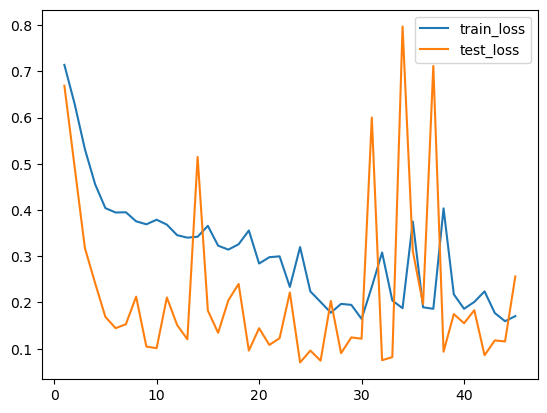

In [14]:
plt.plot(range(1,46),history.history["loss"],label="train_loss")
plt.plot(range(1,46),history.history["val_loss"],label="test_loss") 
plt.legend() 

### Predicting the model


In [15]:
predicted=model.predict(x_test) 
predicted 

1/1 [==============================] - 0s 153ms/step


array([[0.99953276],
       [0.00492819],
       [0.9831613 ],
       [0.01374822],
       [0.02261806],
       [0.00261511],
       [0.996341  ],
       [0.99990773],
       [0.99999917],
       [0.99969923]], dtype=float32)

In [16]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

### Evaluating the model 

0.8


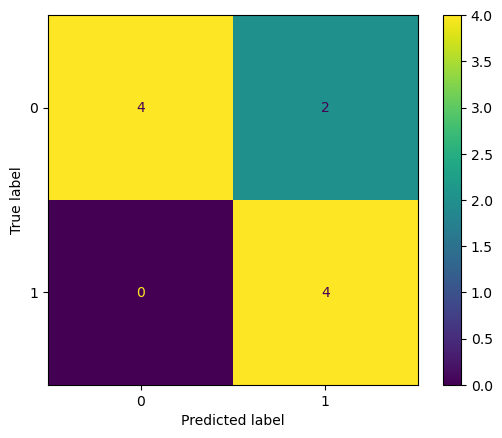

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

### PLOTING THE DECISION SURFACE

In [18]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

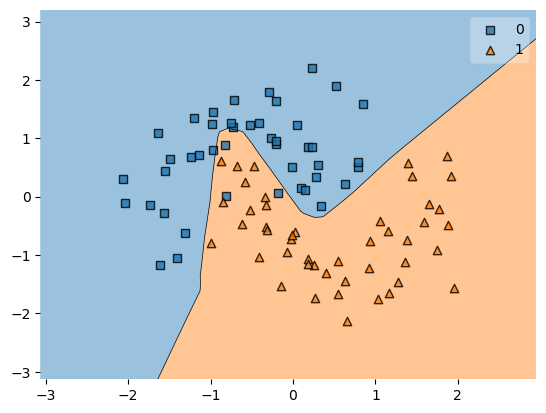

In [19]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 22s 2ms/step


<AxesSubplot:>

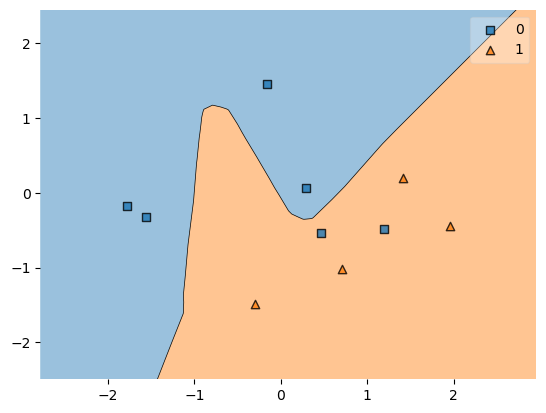

In [20]:
plot_decision_regions(x_test,y_test.values,clf=model) 

### Conclusions:

###### This model achieves an accuracy of 95%. The model architecture consists of 4 hidden layers with the following specifications:

- 1st HL:- 18 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- 2nd HL:- 16 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- 3rd HL:- 12 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- 4th HL:- 8 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.

###### The output layer uses the sigmoid activation function.

##### For model compilation, the following settings were used:

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 5 and a learning rate of 0.01.
- The model was trained for 50 epochs.

###### Overall, this neural network model architecture and training configuration achieve an accuracy of 95%.

In [ ]:
`